# Scientific Python
## Extra credit exercise

## Extra credit challenge -- Guess-the-data

You find 4 csv files on Moodle that we have scrubbed from any identifying text. Explore these datasets using pandas by calculating statistics/making figures and guess what the data is! Upload a representative plot in support of your guess for each dataset. You receive the extra credit if you get at least three guesses right.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

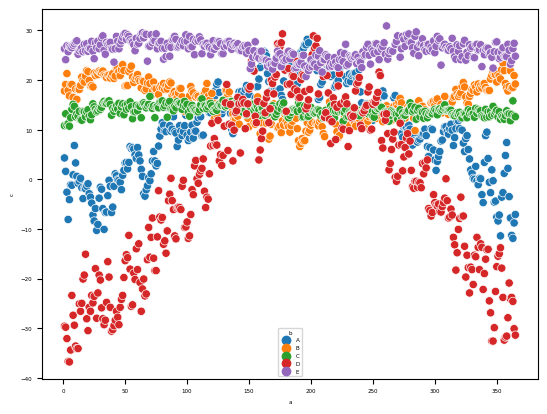

In [264]:
df1 = pd.read_csv("challenge_data_1.csv")
df1.head(50)
#plt.scatter(df1['a'], df1['c'],c=)
#df1['a'].corr(df1['c'])

sns.scatterplot(x='a', y='c', data=df1, hue='b')
df1['c'].unique();

1st dataset: This is probably a time (day), place and minimum/average/maximum temperature dataset.
The first column ('a') must represent the day of the year, because it goes from 1 to 365 five times. I also believe it's "one year five times", not five different years. This is not trivial of course, but if it was 5 different years, most likely they would be consecutive years, but then almost certainly one of them has to have 366 days, which is not the case. The third column, since it goes from values between -30ish to 30ish, and averages between 10 and 20, suggests to me climate temperature data, in Celsius. However, if we plot the data with different color for different 'b' values, we see very different patterns: 'A' seems quite "common", 'D' is very extreme, 'C' is mostly constant, and 'B' and 'E' have higher temperatures for values at 'a' value 0-120 and 242-364 than at the "middle". This could mean that temperatures were measured at different places, maybe a function of different temperature measures (for example, 'D' could represent the "most extreme temperature" measured in Asia per day). I'd think 'C' is an indoor place's measured temperature, 'B' and 'E' are places in the southern hemisphere (where summer is around January), 'A' could just be a place relatively cold e.g North-European country (average temperatures), 'D' is a hard guess, probably a mountainish place.

Answer: <span style="color:green">Correct</span> (D is Australia)

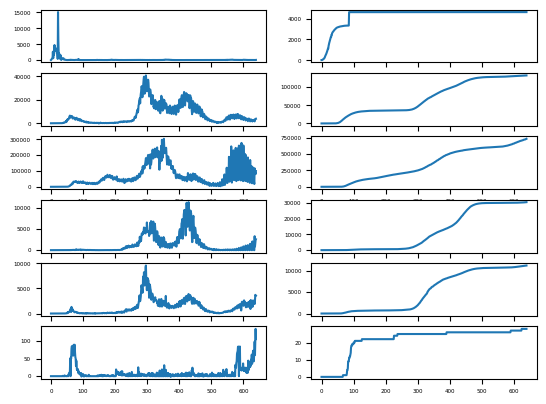

In [265]:
df2 = pd.read_csv("challenge_data_2.csv")
#sns.scatterplot(x='a', y='c', data=df2, hue='b')
fig, axes = plt.subplots(6, 2)
axes[0, 0].plot(df2.index, df2['b'])
axes[0, 1].plot(df2.index, df2['c'])
axes[1, 0].plot(df2.index, df2['d'])
axes[1, 1].plot(df2.index, df2['e'])
axes[2, 0].plot(df2.index, df2['f'])
axes[2, 1].plot(df2.index, df2['g'])
axes[3, 0].plot(df2.index, df2['h'])
axes[3, 1].plot(df2.index, df2['i'])
axes[4, 0].plot(df2.index, df2['j'])
axes[4, 1].plot(df2.index, df2['k'])
axes[5, 0].plot(df2.index, df2['l'])
axes[5, 1].plot(df2.index, df2['m'])
plt.rc('font', size= 4)


2nd dataset: 'a' represents the date (21 months+1 day). Then columns come in "pairs": one plot with 1-2 big bursts commonly, and one cumulative plot (or at least a monotone growing function, if y=f(x) ). The second plot I think should not be the "integral" of the first one though,as on the first and last row plots, we see that the maximal value is much less on the "cumulative" plot, than the maximal value of the "bursty" plot, however, on the 2nd-4th row plots it is the exact opposite, and I'd imagine a more "consistent" integral (of course burst width matters too, but still, there shouldn't be such differences). Considering the timeline (2020 January - 2021 October), I'd think this is a COVID-19 related dataset, and the first plot represents the number of people affected (or maybe registered cases per day), and the second plot, since it is a growing plot, should be the number of deaths. The 6 different pairs may represent 6 different variants.

Answer: <span style="color:green">Correct</span>  (countries, not variants)

,a,b,c,d,e
0,93703,13.7,88.6,2,2
1,93704,13.9,94.2,2,1
2,93705,79.5,158.3,66,2
3,93706,66.3,175.7,18,1
4,93707,45.4,158.4,13,1
...,...,...,...,...,...
9249,102952,49.0,156.5,70,2
9250,102953,97.4,164.9,42,1
9251,102954,69.1,162.6,41,2
9252,102955,111.9,156.6,14,2


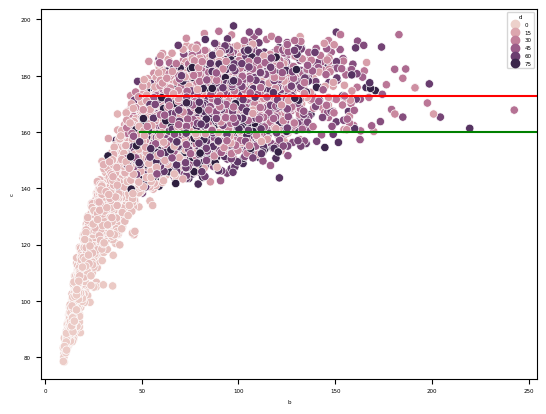

In [263]:
df3 = pd.read_csv("challenge_data_3.csv")
splot = sns.scatterplot(x='b', y='c', data=df3, hue='d', )
cm = df3[(df3['b']> 50) & (df3['e']==1)] ['c'].mean()
plt.axhline(y=cm, color='r', xmin = 0.2)
cf = df3[(df3['b']> 50) & (df3['e']==2)] ['c'].mean()
plt.axhline(y=cf, color='g', xmin = 0.2)

#bm = df3[(df3['b']> 50) & (df3['e']==1)] ['b'].mean()
#plt.axvline(x=bm, color='r')
#bf = df3[(df3['b']> 50) & (df3['e']==2)] ['b'].mean()
#plt.axvline(x=bf, color='g')

#splot.set_xlim(left=34, right=70)
#Extra lines: average on 'e' : 1 and 2 between lets say 50 and 150
df3['d'].value_counts()
df3

3rd dataset:
I think it is about some animal (like an insect), 'a' is just ID, 'b' could be age (maybe in weeks), 'c':Size or Height or Weight, 'e': gender, and 'd' could be something like amount of "children"/laid eggs or anything. Explanation: as the age increases, so does size (and 'b' starts from 0 whereas 'c' does not, that is why I chose 'b' for age, and 'c' for size). I guess "amount of children" for 'd' because till age 50, the value is constant 0, and then it "explodes", the increase is sudden, plus the values are integer. (80 probably means 80+, there is 427 of it, (then 357 of 0), but near it are the least common values: 75-79 are the five least common values of 'd', with around 50 for each.) Lastly, the 'e' is binary so could means gender, on the plot there are the means for 'c' values above age 50 for both "gender", as you can see, they differ quite much, maybe meaning that the green line (value 2) represents the mean for the females, and red for males. 

Another idea I had is some physics measurement, like let's say about particles in an experiment. Time passed could be 'b' (fractions of a second), 'd' could be e.g. temperature or some gain measure, 'c' could be something like overall energy, and 'e' could be again, something binary, like positive/negative charge etc. but I have more "faith" in the animal one.

<b><u>The correct answer:</u></b> <span style="color:red">Humans (gender, age, weight, height).</span> The guess is fairly close, so point is given

0     11.33
1      8.33
2     15.00
6     12.33
9     13.33
11    11.83
12    15.00
14    12.75
18    10.67
20    10.00
21     9.33
Name: d, dtype: float64

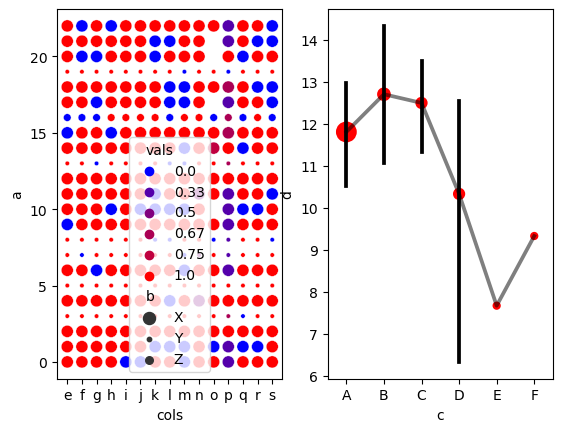

In [36]:
df4 = pd.read_csv("challenge_data_4.csv")
df4m3 = (df4.drop(columns="d")).melt(['a','b','c'], var_name='cols', value_name='vals')
fig, axes = plt.subplots(1, 2)
sns.scatterplot(data=df4m3, x='cols', y='a', hue='vals', palette=sns.color_palette("blend:#00F,#F00", as_cmap=True), size='b', ax=axes[0], sizes={'X': 75, 'Y': 10, 'Z': 30})
#Check 'c' for the other graph
#sns.scatterplot(data=df4m3, x='cols', y='a', hue='c', size='vals',ax=axes[0])
#sns.scatterplot(data=df4m3, x='cols', y='a', hue='b',  size='vals')

#sns.scatterplot(data=df4, x='a', y='d', hue='c', color='red', ax=axes[1])
ax2 = sns.pointplot(data=df4, x='c', y='d', color='black',ax=axes[1])

#patches = ax2.patches
#lines_per_err = 3
#for i, line in enumerate(ax2.get_lines()):
#    line.set_color("black")

#df4[df4['b']=='X']['d'].mean()
points = ax2.collections[0]
size = points.get_sizes().item()
new_sizes = [11*size/3, 4*size/3, size, size, size/3, size/3]
points.set_sizes(new_sizes)
#points.set_edgecolor('blue')
points.set_color('red')
#points.set_linewidth(1)
points.set_alpha(1)
ax2.get_lines()[0].set_alpha(0.5)
df4[df4['c']=='A'] ['d']

4th dataset: I think the rows represent a person, columns 'b' describe the person (probably gender and class/level of profession) and then columns 'e' to 's' (last) describe tasks: each cell in these columns contain the mark/point the person got for that task. Column 'd' is simply the sum of the values (max 15), overall mark. I believe the marks on each task are "independent" from each other: it is not like a competition, where your mark influences other ones' mark, the marks don't depend on others. E.g. if this was a chess competition, then each column should have the same amount of 1s (win) as 0s (draw), and there shall be even amount of 0.5s (draw), but these are not the case. I believe column 'b' should be gender, apart from one value, all other values are binary, and that one "outlier" may be in reality a NaN ("prefered not to answer"), etc.
On column 'c', I think it should be somehow correlated with "how good the person is supposed to do on these tasks". It's not a grade, because then grading would not be fair, I rather think it's more like which group each person belongs to, and these groups are divided by their "level of profession". This is because whilst group 'A' holds half of the people, on average points they do quite well, groups 'B' and 'C' do exceptionally well, 'D' is fairly average and the two values in E, F are very low. The two plots I looked at look better when not plotted next to each other (still new to axis sizing at subplots).

(on the left plot, it makes more sense to adjust sizes accordingly to the values, and color based on X Y Z, but I find this way it says more about the data)

45.80442088933919

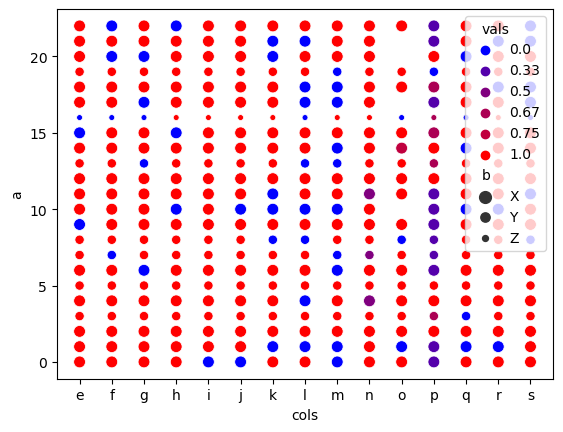

In [8]:
df1 = pd.read_csv("challenge_data_1.csv")
df2 = pd.read_csv("challenge_data_2.csv")
df3 = pd.read_csv("challenge_data_3.csv")
df4 = pd.read_csv("challenge_data_4.csv")

#df3[0:50]
#plt.hist(df3['c'], bins=102956-93702)
#df3['d'].value_counts()
#df3['d'].value_counts().plot(kind='bar', )
#(df3['d'].value_counts()).sort_index().plot(kind='bar', )
#plt.scatter(df3['b'], df3['c'])

#print(min(df3['b']), max(df3['b']), min(df3['c']), max(df3['c']))
#splot = sns.scatterplot(x='b', y='c', data=df3, hue='d', )
#splot.set_xlim(left=34, right=70
# 

#df4t = df4.transpose()
#df4t  
#sns.displot()
#sns.displot(data=df4, x="", hue="species", multiple="stack")
df4m1 = df4.melt('a', var_name='cols', value_name='vals')
df4m1
df4m2 = (df4.drop(columns=["b","c","d"])).melt('a', var_name='cols', value_name='vals')
df4m2
df4m3 = (df4.drop(columns="d")).melt(['a','b','c'], var_name='cols', value_name='vals')
df4m3
#sns.pointplot(x='cols',y='vals',hue='a',data=df4m3)
df4
#sns.pointplot(x='cols',y='a',hue='vals',data=df4m3)
#sns.scatterplot(data=df4m3, x='cols', y='a', hue='vals', palette=sns.color_palette("dark:#5A9_r", as_cmap=True))
sns.scatterplot(data=df4m3, x='cols', y='a', hue='vals', palette=sns.color_palette("blend:#00F,#F00", as_cmap=True), size='b')
#df4[(df4["s"]!=0)&(df4["s"]!=1)]
df4["c"].value_counts()
size

<b><u>The correct answer:</u></b> <span style="color:red">Results of the first quiz from our course.</span> The guess is fairly correct, so point is given